In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# load our data
df = pd.read_csv('../datasets/compressions.csv')

# old dataset w/ 25/50/75/100 compression
df = df[['Question', 'Subdomain', 'High-level domain', 'Record ID', 'original_word_count', 'compression_75', 'compression_75_word_count',
       'compression_75_target_words', 'compression_50',
       'compression_50_word_count', 'compression_50_target_words',
       'compression_25', 'compression_25_word_count',
       'compression_25_target_words']]

# final results
results = pd.read_csv("../final_results.csv")
df = pd.merge(df, results, on='Question')

In [23]:
# First, let's create the base columns that will be repeated for each version
base_columns = ['Subdomain', 'High-level domain', 'Record ID',
                'Correct Answer', 'Incorrect Answer 1', 'Incorrect Answer 2', 'Incorrect Answer 3',
                'Shuffled Choice 1', 'Shuffled Choice 2', 'Shuffled Choice 3', 'Shuffled Choice 4',
                'Correct Index']

# Create the new dataframe structure
new_rows = []

for _, row in df.iterrows():
    # Base info that's same for all versions
    base_info = {col: row[col] for col in base_columns}
    
    # Original version (100%)
    new_rows.append({
        **base_info,
        'Question': row['Question'],
        'word_count': row['original_word_count'],
        'target_words': row['original_word_count'],  # target is same as actual for original
        'predicted': row['compression_100_predicted'],
        'correct': row['compression_100_correct']
    })
    
    # 75% version
    new_rows.append({
        **base_info,
        'Question': row['compression_75'],
        'word_count': row['compression_75_word_count'],
        'target_words': row['compression_75_target_words'],
        'predicted': row['compression_75_predicted'],
        'correct': row['compression_75_correct']
    })
    
    # 50% version
    new_rows.append({
        **base_info,
        'Question': row['compression_50'],
        'word_count': row['compression_50_word_count'],
        'target_words': row['compression_50_target_words'],
        'predicted': row['compression_50_predicted'],
        'correct': row['compression_50_correct']
    })
    
    # 25% version
    new_rows.append({
        **base_info,
        'Question': row['compression_25'],
        'word_count': row['compression_25_word_count'],
        'target_words': row['compression_25_target_words'],
        'predicted': row['compression_25_predicted'],
        'correct': row['compression_25_correct']
    })

# Create new dataframe
new_df = pd.DataFrame(new_rows)

# Get the original (max) word count for each Record ID
original_word_counts = new_df.groupby('Record ID')['word_count'].max()

new_df['original_word_count'] = new_df['Record ID'].map(original_word_counts)

# Calculate actual compression percentage using the max word count for each Record ID
new_df['percent_of_original'] = new_df.apply(lambda row: (row['word_count'] / original_word_counts[row['Record ID']]) * 100, axis=1)


# Sort by Record ID and compression percentage
new_df = new_df.sort_values(['Record ID', 'percent_of_original'])

df = new_df

In [24]:
# drop NA values
df = df.dropna()

df

,Subdomain,High-level domain,Record ID,Correct Answer,Incorrect Answer 1,Incorrect Answer 2,Incorrect Answer 3,Shuffled Choice 1,Shuffled Choice 2,Shuffled Choice 3,Shuffled Choice 4,Correct Index,Question,word_count,target_words,predicted,correct,original_word_count,percent_of_original
3,Physics (general),Physics,rec06pnAkLOr2t2mp,10^-4 eV,10^-11 eV,10^-8 eV\r\n,10^-9 eV,10^-8 eV\r\n,10^-11 eV,10^-9 eV,10^-4 eV,3,"States E1, E2 lifetimes 10^-9, 10^-8 seconds. ...",11.0,11.0,D,True,45.0,24.444444
2,Physics (general),Physics,rec06pnAkLOr2t2mp,10^-4 eV,10^-11 eV,10^-8 eV\r\n,10^-9 eV,10^-8 eV\r\n,10^-11 eV,10^-9 eV,10^-4 eV,3,"Quantum states with energies E1, E2, lifetimes...",20.0,22.0,D,True,45.0,44.444444
1,Physics (general),Physics,rec06pnAkLOr2t2mp,10^-4 eV,10^-11 eV,10^-8 eV\r\n,10^-9 eV,10^-8 eV\r\n,10^-11 eV,10^-9 eV,10^-4 eV,3,"Two quantum states with energies E1, E2, lifet...",27.0,34.0,D,True,45.0,60.000000
0,Physics (general),Physics,rec06pnAkLOr2t2mp,10^-4 eV,10^-11 eV,10^-8 eV\r\n,10^-9 eV,10^-8 eV\r\n,10^-11 eV,10^-9 eV,10^-4 eV,3,Two quantum states with energies E1 and E2 hav...,45.0,45.0,D,True,45.0,100.000000
7,Organic Chemistry,Chemistry,rec0Arme2jcXQZnAW,11,10,12,14,12,14,10,11,3,Cinnamaldehyde transformed. Oxidized intermedi...,8.0,10.0,D,True,40.0,20.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
636,Optics and Acoustics,Physics,reczjcMtrB1YGS2fO,0.506 \lambda / a,1.220 \lambda /a,0.500 \lambda / a,0.610 \lambda / a,0.610 \lambda / a,1.220 \lambda /a,0.500 \lambda / a,0.506 \lambda / a,3,"Consider an aperture, which shapes like a N-si...",80.0,80.0,B,False,80.0,100.000000
643,Relativistic Mechanics,Physics,reczzzihL7btBH7RO,λ2 < λ1,λ2 >= 1.22*λ1,λ1 < λ2 < 1.22*λ1,"λ2 = λ1, indicating a discrepancy in Mike's ob...",λ2 < λ1,λ2 >= 1.22*λ1,λ1 < λ2 < 1.22*λ1,"λ2 = λ1, indicating a discrepancy in Mike's ob...",0,"Designing an electron microscope, Mike created...",36.0,38.0,A,True,153.0,23.529412
642,Relativistic Mechanics,Physics,reczzzihL7btBH7RO,λ2 < λ1,λ2 >= 1.22*λ1,λ1 < λ2 < 1.22*λ1,"λ2 = λ1, indicating a discrepancy in Mike's ob...",λ2 < λ1,λ2 >= 1.22*λ1,λ1 < λ2 < 1.22*λ1,"λ2 = λ1, indicating a discrepancy in Mike's ob...",0,Designing a high-resolution transmission elect...,61.0,76.0,A,True,153.0,39.869281
641,Relativistic Mechanics,Physics,reczzzihL7btBH7RO,λ2 < λ1,λ2 >= 1.22*λ1,λ1 < λ2 < 1.22*λ1,"λ2 = λ1, indicating a discrepancy in Mike's ob...",λ2 < λ1,λ2 >= 1.22*λ1,λ1 < λ2 < 1.22*λ1,"λ2 = λ1, indicating a discrepancy in Mike's ob...",0,While designing a high-resolution transmission...,80.0,115.0,B,False,153.0,52.287582


In [25]:
df['percent_of_original'].describe()

count    668.000000
mean      52.902498
std       30.910545
min       10.000000
25%       26.458465
50%       43.166252
75%      100.000000
max      100.000000
Name: percent_of_original, dtype: float64

# Distribution of Compression

The story:

Distribution of compression percentages is skewed left...

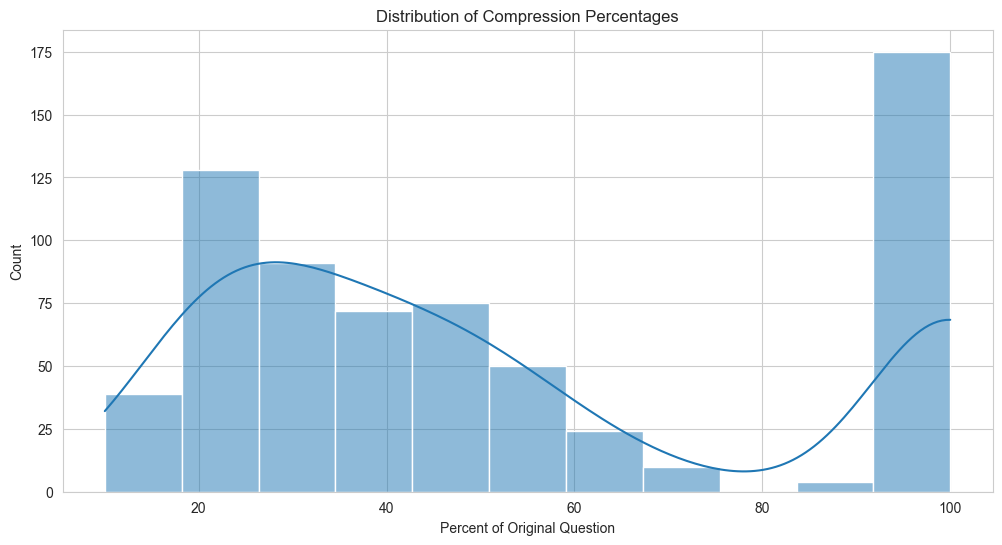

In [26]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='percent_of_original', kde=True)
plt.title('Distribution of Compression Percentages')
plt.xlabel('Percent of Original Question')
plt.ylabel('Count')
plt.show()

## Across Subdomains

C:\Users\Bryan Sukidi\AppData\Local\Temp\ipykernel_31788\3732926359.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Compression_Bucket'] = pd.cut(df['percent_of_original'], bins=bins, labels=labels, include_lowest=True)
C:\Users\Bryan Sukidi\AppData\Local\Temp\ipykernel_31788\3732926359.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  subdomain_analysis = df.groupby(['Subdomain', 'Compression_Bucket'])['correct'].agg(['mean', 'count']).reset_index()


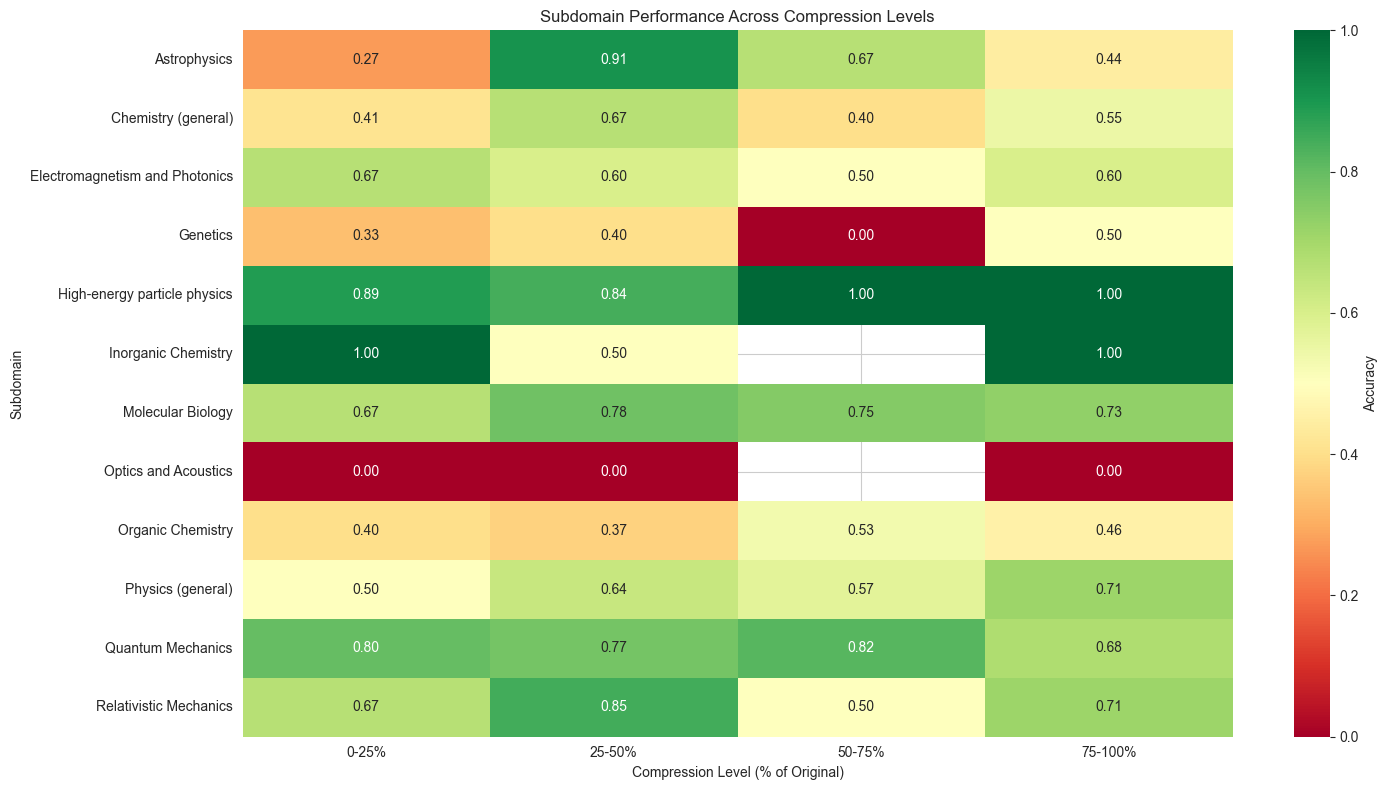


Accuracy Drop by Subdomain:
                                                     Subdomain  Accuracy_Drop
Subdomain                                                                    
Physics (general)                            Physics (general)       0.214286
Astrophysics                                      Astrophysics       0.171717
Genetics                                              Genetics       0.166667
Chemistry (general)                        Chemistry (general)       0.138235
High-energy particle physics      High-energy particle physics       0.111111
Molecular Biology                            Molecular Biology       0.066667
Organic Chemistry                            Organic Chemistry       0.055882
Relativistic Mechanics                  Relativistic Mechanics       0.047619
Optics and Acoustics                      Optics and Acoustics       0.000000
Inorganic Chemistry                        Inorganic Chemistry       0.000000
Electromagnetism and Photonics  Ele

c:\Users\Bryan Sukidi\Projects\SPAR-trial\venv\lib\site-packages\scipy\stats\_axis_nan_policy.py:531: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


In [27]:
# Create custom bins to avoid duplicates
bins = [0, 25, 50, 75, 100]
labels = ['0-25%', '25-50%', '50-75%', '75-100%']

# Group by Subdomain and calculate mean accuracy at different compression levels
df['Compression_Bucket'] = pd.cut(df['percent_of_original'], bins=bins, labels=labels, include_lowest=True)
subdomain_analysis = df.groupby(['Subdomain', 'Compression_Bucket'])['correct'].agg(['mean', 'count']).reset_index()
subdomain_analysis.columns = ['Subdomain', 'Compression_Bucket', 'Accuracy', 'Count']

# Create a pivot table for easier plotting
pivot_data = subdomain_analysis.pivot(index='Subdomain', columns='Compression_Bucket', values='Accuracy')

# Plot
plt.figure(figsize=(15, 8))
sns.heatmap(pivot_data, annot=True, cmap='RdYlGn', fmt='.2f', cbar_kws={'label': 'Accuracy'})
plt.title('Subdomain Performance Across Compression Levels')
plt.xlabel('Compression Level (% of Original)')
plt.ylabel('Subdomain')
plt.tight_layout()
plt.show()

# Calculate accuracy drop for each subdomain
accuracy_drop = pd.DataFrame({
    'Subdomain': pivot_data.index,
    'Max_Compression_Accuracy': pivot_data['0-25%'],     # Most compressed
    'Min_Compression_Accuracy': pivot_data['75-100%'],   # Least compressed
})
accuracy_drop['Accuracy_Drop'] = accuracy_drop['Min_Compression_Accuracy'] - accuracy_drop['Max_Compression_Accuracy']
accuracy_drop = accuracy_drop.sort_values('Accuracy_Drop', ascending=False)

print("\nAccuracy Drop by Subdomain:")
print(accuracy_drop[['Subdomain', 'Accuracy_Drop']].to_string())

# Calculate average accuracy for each subdomain
avg_accuracy = df.groupby('Subdomain')['correct'].mean().sort_values(ascending=False)

print("\nOverall Average Accuracy by Subdomain:")
print(avg_accuracy.to_string())

# Statistical test for significance
from scipy import stats

# Prepare data for statistical testing
high_compression = df[df['percent_of_original'] <= 50]  # Using 50% as threshold
low_compression = df[df['percent_of_original'] > 50]

print("\nStatistical Tests (High vs Low Compression) by Subdomain:")
for subdomain in df['Subdomain'].unique():
    high_comp_acc = high_compression[high_compression['Subdomain'] == subdomain]['correct']
    low_comp_acc = low_compression[low_compression['Subdomain'] == subdomain]['correct']
    
    if len(high_comp_acc) > 0 and len(low_comp_acc) > 0:
        stat, p_value = stats.ttest_ind(high_comp_acc, low_comp_acc)
        print(f"\n{subdomain}:")
        print(f"t-statistic: {stat:.3f}")
        print(f"p-value: {p_value:.3f}")

C:\Users\Bryan Sukidi\AppData\Local\Temp\ipykernel_31788\3569954455.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['word_count_bins'] = pd.qcut(df['original_word_count'], q=5, labels=['Very Short', 'Short', 'Medium', 'Long', 'Very Long'])
C:\Users\Bryan Sukidi\AppData\Local\Temp\ipykernel_31788\3569954455.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_by_length = df.groupby(['word_count_bins', 'Compression_Bucket'])['correct'].mean().unstack()


<Figure size 1200x600 with 0 Axes>

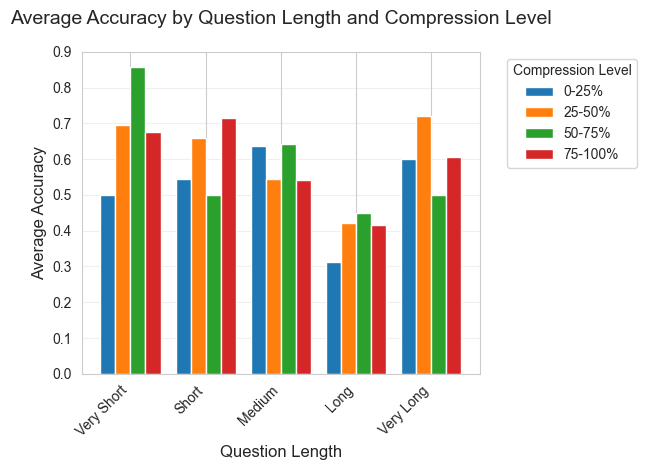


Detailed Statistics:
Compression_Bucket  0-25%  25-50%  50-75%  75-100%
word_count_bins                                   
Very Short          0.500   0.696   0.857    0.675
Short               0.545   0.659   0.500    0.714
Medium              0.636   0.545   0.643    0.543
Long                0.312   0.422   0.450    0.417
Very Long           0.600   0.720   0.500    0.606

Word count ranges for each length category:
                  min    max
word_count_bins             
Very Short        9.0   34.0
Short            35.0   49.0
Medium           50.0   77.0
Long             79.0   95.0
Very Long        96.0  283.0


C:\Users\Bryan Sukidi\AppData\Local\Temp\ipykernel_31788\3569954455.py:30: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  word_count_ranges = df.groupby('word_count_bins')['original_word_count'].agg(['min', 'max'])


In [38]:
# Set seaborn style
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))

# Calculate and plot average accuracy by word count bins and compression level
df['word_count_bins'] = pd.qcut(df['original_word_count'], q=5, labels=['Very Short', 'Short', 'Medium', 'Long', 'Very Long'])
avg_by_length = df.groupby(['word_count_bins', 'Compression_Bucket'])['correct'].mean().unstack()

# Create the bar plot
ax = avg_by_length.plot(kind='bar', width=0.8)

# Customize the plot
plt.title('Average Accuracy by Question Length and Compression Level', fontsize=14, pad=20)
plt.xlabel('Question Length', fontsize=12)
plt.ylabel('Average Accuracy', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Compression Level', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add grid for easier reading
plt.grid(True, axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Print statistics
print("\nDetailed Statistics:")
print(avg_by_length.round(3))

# Print word count ranges for each bin
word_count_ranges = df.groupby('word_count_bins')['original_word_count'].agg(['min', 'max'])
print("\nWord count ranges for each length category:")
print(word_count_ranges.round(1))

C:\Users\Bryan Sukidi\AppData\Local\Temp\ipykernel_31788\2462144764.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['word_count_bins'] = pd.qcut(df['original_word_count'], q=5,
C:\Users\Bryan Sukidi\AppData\Local\Temp\ipykernel_31788\2462144764.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_by_relative = df.groupby(['word_count_bins', 'Compression_Bucket'])['correct'].mean().unstack()
C:\Users\Bryan Sukidi\AppData\Local\Temp\ipykernel_31788\2462144764.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

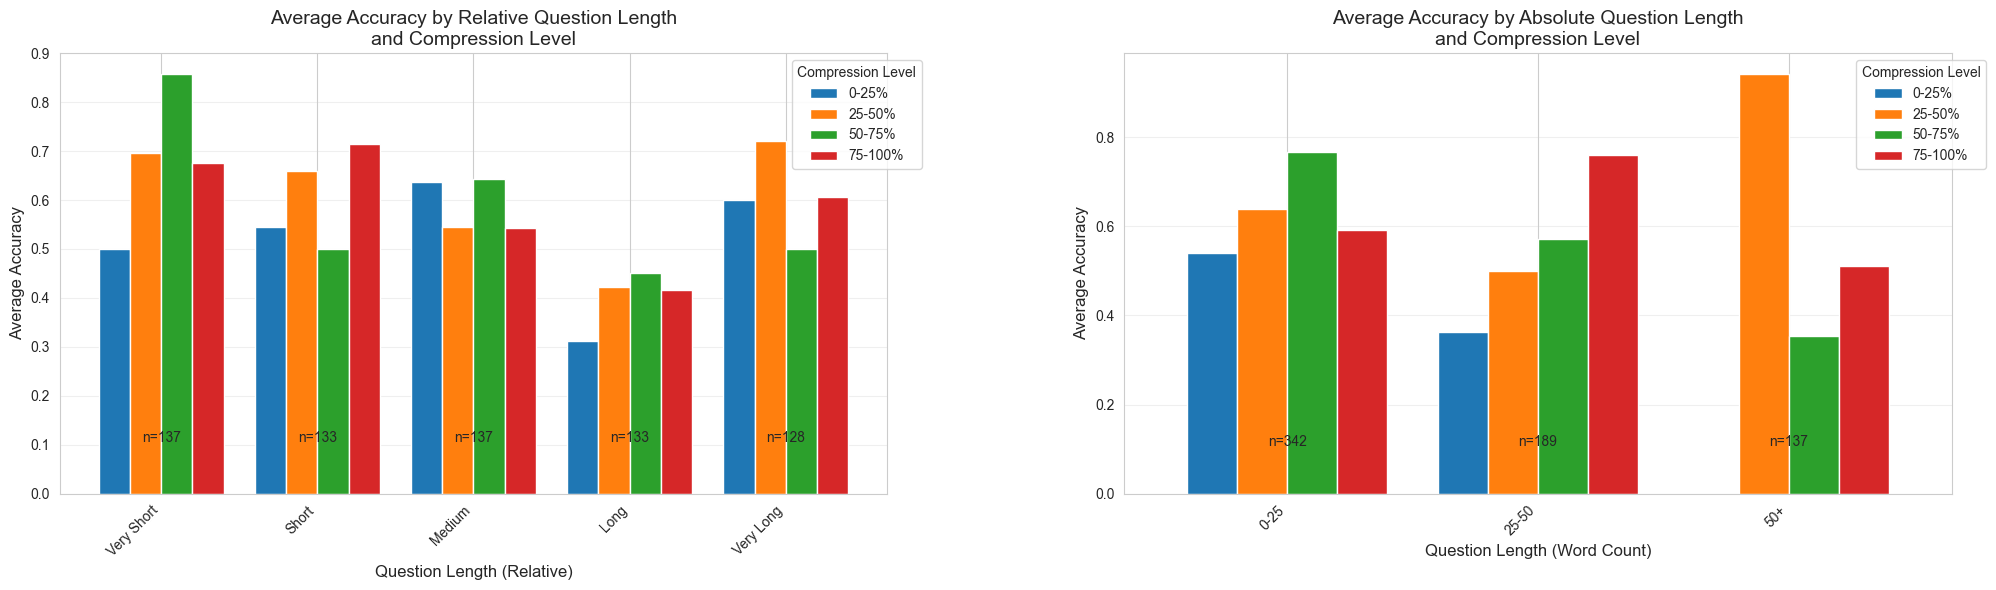


1. Relative Length Statistics:
Average accuracy by bin:
Compression_Bucket  0-25%  25-50%  50-75%  75-100%
word_count_bins                                   
Very Short          0.500   0.696   0.857    0.675
Short               0.545   0.659   0.500    0.714
Medium              0.636   0.545   0.643    0.543
Long                0.312   0.422   0.450    0.417
Very Long           0.600   0.720   0.500    0.606

Counts for relative bins:
word_count_bins
Very Short    137
Short         133
Medium        137
Long          133
Very Long     128
dtype: int64

Word count ranges for relative bins:
                  min    max  count
word_count_bins                    
Very Short        9.0   34.0    137
Short            35.0   49.0    133
Medium           50.0   77.0    137
Long             79.0   95.0    133
Very Long        96.0  283.0    128

2. Absolute Length Statistics:
Average accuracy by bin:
Compression_Bucket  0-25%  25-50%  50-75%  75-100%
absolute_bins                             

C:\Users\Bryan Sukidi\AppData\Local\Temp\ipykernel_31788\2462144764.py:47: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('word_count_bins').size())
C:\Users\Bryan Sukidi\AppData\Local\Temp\ipykernel_31788\2462144764.py:49: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('word_count_bins')['original_word_count'].agg(['min', 'max', 'count']).round(1))
C:\Users\Bryan Sukidi\AppData\Local\Temp\ipykernel_31788\2462144764.py:55: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current b

In [36]:
# Set seaborn style
sns.set_style("whitegrid")
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

# 1. Original relative length plot (left)
df['word_count_bins'] = pd.qcut(df['original_word_count'], q=5, 
                               labels=['Very Short', 'Short', 'Medium', 'Long', 'Very Long'])
avg_by_relative = df.groupby(['word_count_bins', 'Compression_Bucket'])['correct'].mean().unstack()
avg_by_relative.plot(kind='bar', ax=ax1, width=0.8)
ax1.set_title('Average Accuracy by Relative Question Length\nand Compression Level', fontsize=14)
ax1.set_xlabel('Question Length (Relative)', fontsize=12)
ax1.set_ylabel('Average Accuracy', fontsize=12)
ax1.tick_params(axis='x', rotation=45)
ax1.set_xticklabels(ax1.get_xticklabels(), horizontalalignment='right')
ax1.grid(True, axis='y', alpha=0.3)
ax1.legend(title='Compression Level', bbox_to_anchor=(1.05, 1))

# 2. Absolute length plot (right)
bins = [0, 25, 50, float('inf')]
labels = ['0-25', '25-50', '50+']
df['absolute_bins'] = pd.cut(df['word_count'], bins=bins, labels=labels)

avg_by_absolute = df.groupby(['absolute_bins', 'Compression_Bucket'])['correct'].mean().unstack()
avg_by_absolute.plot(kind='bar', ax=ax2, width=0.8)
ax2.set_title('Average Accuracy by Absolute Question Length\nand Compression Level', fontsize=14)
ax2.set_xlabel('Question Length (Word Count)', fontsize=12)
ax2.set_ylabel('Average Accuracy', fontsize=12)
ax2.tick_params(axis='x', rotation=45)
ax2.set_xticklabels(ax2.get_xticklabels(), horizontalalignment='right')
ax2.grid(True, axis='y', alpha=0.3)
ax2.legend(title='Compression Level', bbox_to_anchor=(1.05, 1))

# Add counts as text on the bars
for ax, data in [(ax1, avg_by_relative), (ax2, avg_by_absolute)]:
    counts = df.groupby(df['absolute_bins' if ax == ax2 else 'word_count_bins']).size()
    for i, count in enumerate(counts):
        ax.text(i, 0.1, f'n={count}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Print detailed statistics
print("\n1. Relative Length Statistics:")
print("Average accuracy by bin:")
print(avg_by_relative.round(3))
print("\nCounts for relative bins:")
print(df.groupby('word_count_bins').size())
print("\nWord count ranges for relative bins:")
print(df.groupby('word_count_bins')['original_word_count'].agg(['min', 'max', 'count']).round(1))

print("\n2. Absolute Length Statistics:")
print("Average accuracy by bin:")
print(avg_by_absolute.round(3))
print("\nCounts for absolute bins:")
print(df.groupby('absolute_bins').size())
print("\nWord count ranges for absolute bins:")
print(df.groupby('absolute_bins')['word_count'].agg(['min', 'max', 'count']).round(1))

C:\Users\Bryan Sukidi\AppData\Local\Temp\ipykernel_31788\853744718.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_by_compression = df.groupby('Compression_Bucket')['correct'].mean()
C:\Users\Bryan Sukidi\AppData\Local\Temp\ipykernel_31788\853744718.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = df.groupby('Compression_Bucket').size()
C:\Users\Bryan Sukidi\AppData\Local\Temp\ipykernel_31788\853744718.py:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True 

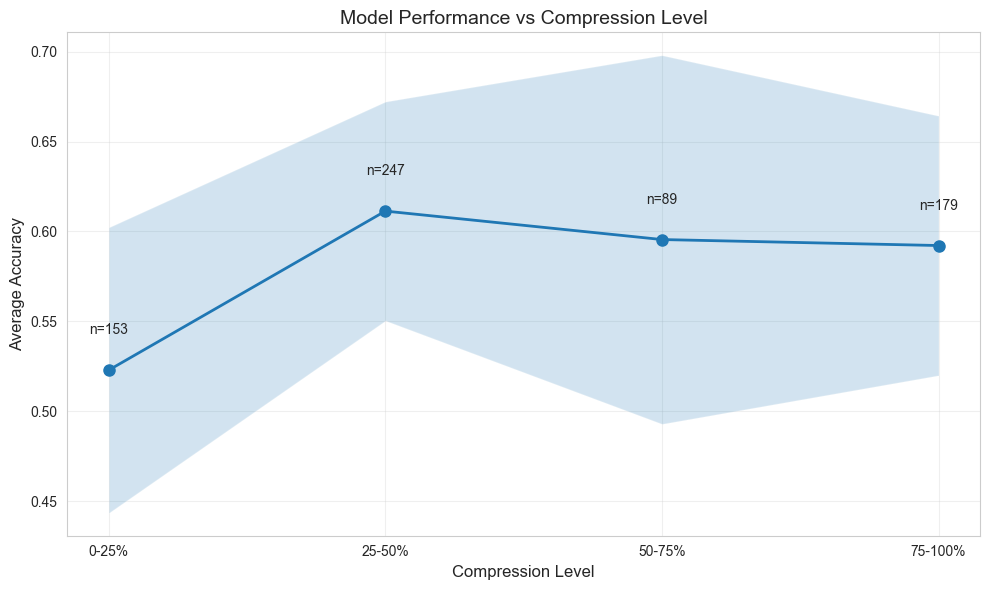


Detailed Statistics:
                   correct              percent_of_original
                      mean    std count                mean
Compression_Bucket                                         
0-25%                0.523  0.501   153              20.146
25-50%               0.611  0.488   247              37.333
50-75%               0.596  0.494    89              58.279
75-100%              0.592  0.493   179              99.712


C:\Users\Bryan Sukidi\AppData\Local\Temp\ipykernel_31788\853744718.py:36: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stats = df.groupby('Compression_Bucket').agg({


In [40]:
import numpy as np 
sns.set_style("whitegrid")

# Create the plot
plt.figure(figsize=(10, 6))

# Calculate mean accuracy for each compression level
avg_by_compression = df.groupby('Compression_Bucket')['correct'].mean()

# Plot
plt.plot(avg_by_compression.index, avg_by_compression.values, 'o-', linewidth=2, markersize=8)

# Add sample sizes
counts = df.groupby('Compression_Bucket').size()
for i, (level, acc) in enumerate(avg_by_compression.items()):
    plt.text(i, acc + 0.02, f'n={counts[level]}', ha='center')

# Customize the plot
plt.title('Model Performance vs Compression Level', fontsize=14)
plt.xlabel('Compression Level', fontsize=12)
plt.ylabel('Average Accuracy', fontsize=12)
plt.grid(True, alpha=0.3)

# Add error bars (95% confidence intervals)
ci = df.groupby('Compression_Bucket')['correct'].agg(lambda x: 1.96 * x.std() / np.sqrt(len(x)))
plt.fill_between(range(len(avg_by_compression)), 
                avg_by_compression - ci, 
                avg_by_compression + ci, 
                alpha=0.2)

plt.tight_layout()
plt.show()

# Print detailed statistics
print("\nDetailed Statistics:")
stats = df.groupby('Compression_Bucket').agg({
    'correct': ['mean', 'std', 'count'],
    'percent_of_original': 'mean'
}).round(3)
print(stats)

C:\Users\Bryan Sukidi\AppData\Local\Temp\ipykernel_31788\180275438.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['compression_10s'] = pd.cut(df['percent_of_original'],
C:\Users\Bryan Sukidi\AppData\Local\Temp\ipykernel_31788\180275438.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_by_compression = df.groupby('compression_10s')['correct'].mean()
C:\Users\Bryan Sukidi\AppData\Local\Temp\ipykernel_31788\180275438.py:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass 

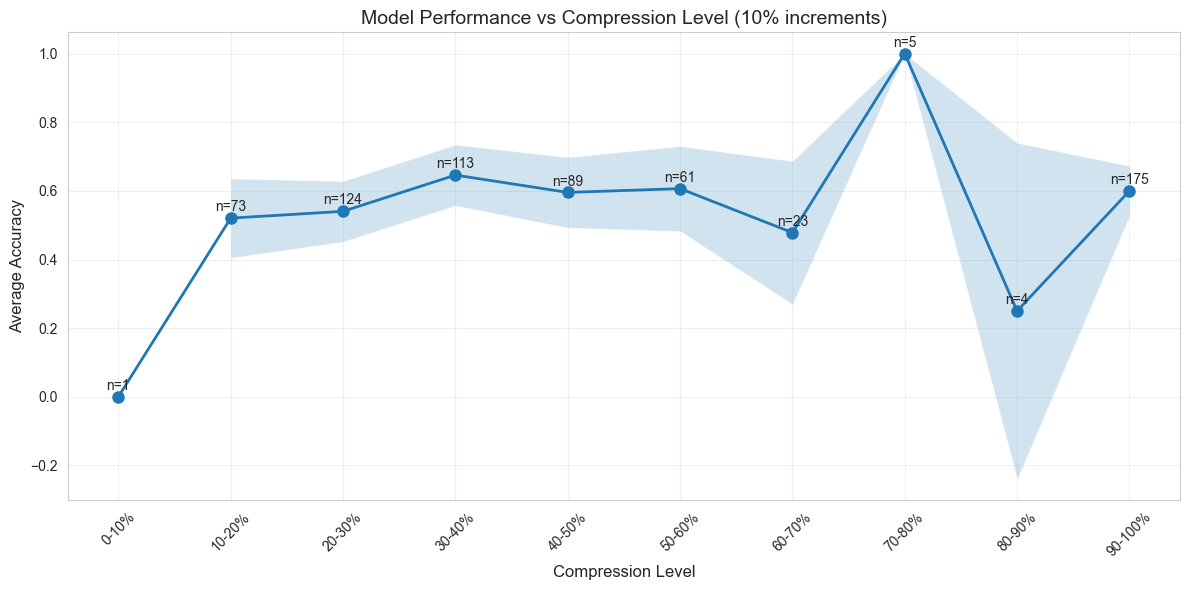


Detailed Statistics:
                correct              percent_of_original
                   mean    std count                mean
compression_10s                                         
0-10%             0.000    NaN     1              10.000
10-20%            0.521  0.503    73              17.324
20-30%            0.540  0.500   124              24.559
30-40%            0.646  0.480   113              34.890
40-50%            0.596  0.494    89              45.406
50-60%            0.607  0.493    61              54.804
60-70%            0.478  0.511    23              64.425
70-80%            1.000  0.000     5              72.407
80-90%            0.250  0.500     4              87.118
90-100%           0.600  0.491   175             100.000


C:\Users\Bryan Sukidi\AppData\Local\Temp\ipykernel_31788\180275438.py:50: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stats = df.groupby('compression_10s').agg({


In [41]:
# Set seaborn style
sns.set_style("whitegrid")

# Create bins by 10s
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-10%', '10-20%', '20-30%', '30-40%', '40-50%', 
          '50-60%', '60-70%', '70-80%', '80-90%', '90-100%']

# Create new compression buckets by 10s
df['compression_10s'] = pd.cut(df['percent_of_original'], 
                              bins=bins, 
                              labels=labels,
                              include_lowest=True)

# Create the plot
plt.figure(figsize=(12, 6))

# Calculate mean accuracy for each compression level
avg_by_compression = df.groupby('compression_10s')['correct'].mean()

# Plot
plt.plot(range(len(avg_by_compression)), avg_by_compression.values, 'o-', linewidth=2, markersize=8)

# Add sample sizes
counts = df.groupby('compression_10s').size()
for i, (level, acc) in enumerate(avg_by_compression.items()):
    plt.text(i, acc + 0.02, f'n={counts[level]}', ha='center')

# Customize the plot
plt.title('Model Performance vs Compression Level (10% increments)', fontsize=14)
plt.xlabel('Compression Level', fontsize=12)
plt.ylabel('Average Accuracy', fontsize=12)
plt.grid(True, alpha=0.3)

# Set x-ticks
plt.xticks(range(len(labels)), labels, rotation=45)

# Add error bars (95% confidence intervals)
ci = df.groupby('compression_10s')['correct'].agg(lambda x: 1.96 * x.std() / np.sqrt(len(x)))
plt.fill_between(range(len(avg_by_compression)), 
                avg_by_compression - ci, 
                avg_by_compression + ci, 
                alpha=0.2)

plt.tight_layout()
plt.show()

# Print detailed statistics
print("\nDetailed Statistics:")
stats = df.groupby('compression_10s').agg({
    'correct': ['mean', 'std', 'count'],
    'percent_of_original': 'mean'
}).round(3)
print(stats)

C:\Users\Bryan Sukidi\AppData\Local\Temp\ipykernel_31788\4050739005.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['high_compression'] = df['percent_of_original'] < 50


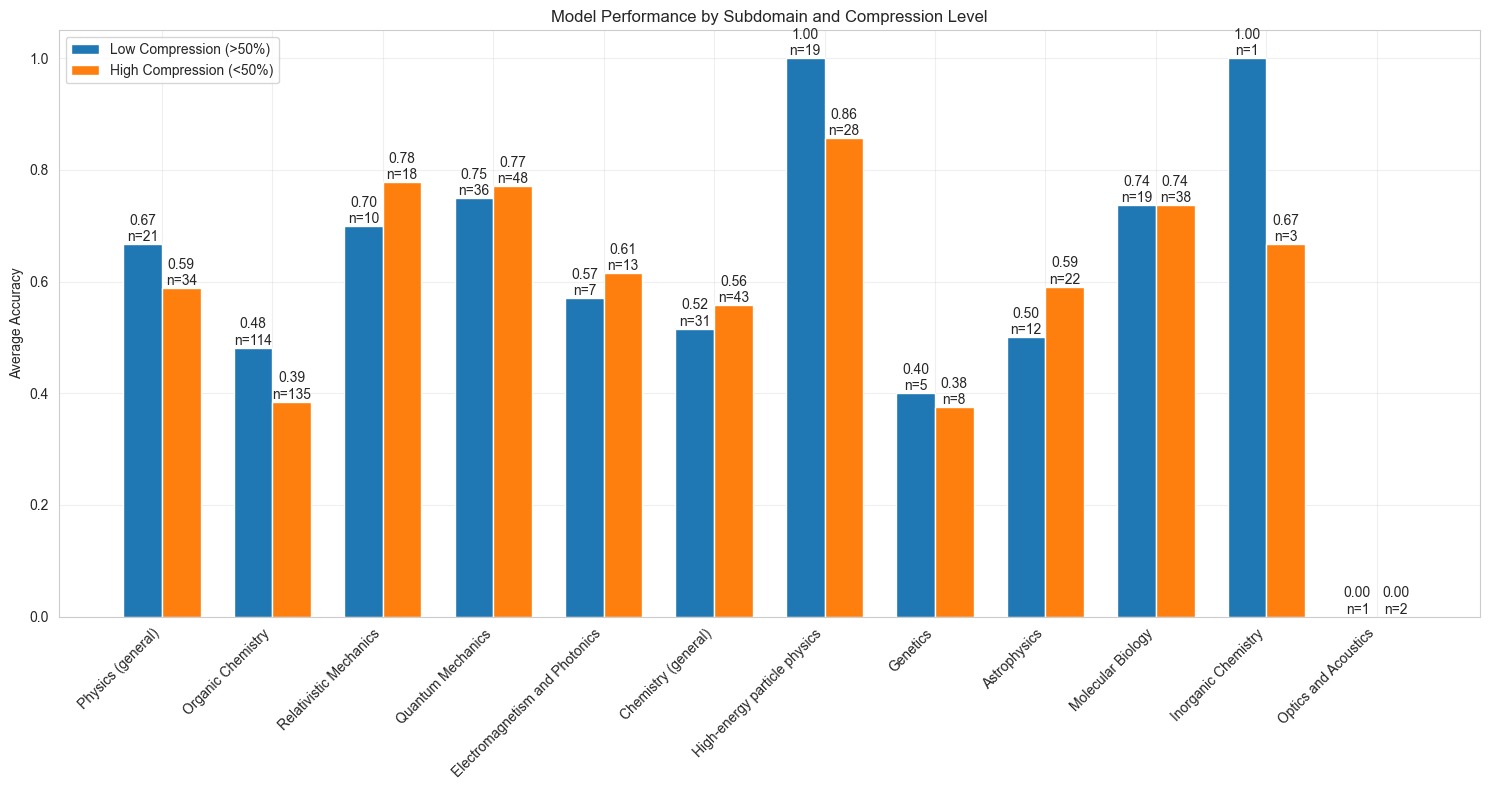


Detailed Statistics by Subdomain:
                                 mean         count           std       
high_compression                False  True   False  True   False  True 
Subdomain                                                               
Astrophysics                    0.500  0.591   12.0   22.0  0.522  0.503
Chemistry (general)             0.516  0.558   31.0   43.0  0.508  0.502
Electromagnetism and Photonics  0.571  0.615    7.0   13.0  0.535  0.506
Genetics                        0.400  0.375    5.0    8.0  0.548  0.518
High-energy particle physics    1.000  0.857   19.0   28.0  0.000  0.356
Inorganic Chemistry             1.000  0.667    1.0    3.0    NaN  0.577
Molecular Biology               0.737  0.737   19.0   38.0  0.452  0.446
Optics and Acoustics            0.000  0.000    1.0    2.0    NaN  0.000
Organic Chemistry               0.482  0.385  114.0  135.0  0.502  0.488
Physics (general)               0.667  0.588   21.0   34.0  0.483  0.500
Quantum Mechanic

In [42]:
# Create binary compression level
df['high_compression'] = df['percent_of_original'] < 50

# Calculate average accuracy for each subdomain and compression level
subdomain_performance = df.groupby(['Subdomain', 'high_compression'])['correct'].agg(['mean', 'count', 'std']).round(3)
subdomain_performance = subdomain_performance.reset_index()

# Create the plot
plt.figure(figsize=(15, 8))

# Get unique subdomains
subdomains = df['Subdomain'].unique()
x = np.arange(len(subdomains))
width = 0.35

# Plot bars
low_comp = plt.bar(x - width/2, 
                  [subdomain_performance[(subdomain_performance['Subdomain'] == sd) & 
                                      (subdomain_performance['high_compression'] == False)]['mean'].iloc[0] 
                   for sd in subdomains],
                  width, label='Low Compression (>50%)')

high_comp = plt.bar(x + width/2, 
                   [subdomain_performance[(subdomain_performance['Subdomain'] == sd) & 
                                       (subdomain_performance['high_compression'] == True)]['mean'].iloc[0] 
                    for sd in subdomains],
                   width, label='High Compression (<50%)')

# Customize plot
plt.ylabel('Average Accuracy')
plt.title('Model Performance by Subdomain and Compression Level')
plt.xticks(x, subdomains, rotation=45, ha='right')
plt.legend()
plt.grid(True, alpha=0.3)

# Add value labels and sample sizes
def autolabel(rects, compression_type):
    for i, rect in enumerate(rects):
        height = rect.get_height()
        count = subdomain_performance[(subdomain_performance['Subdomain'] == subdomains[i]) & 
                                    (subdomain_performance['high_compression'] == (compression_type == 'high'))]['count'].iloc[0]
        plt.text(rect.get_x() + rect.get_width()/2., height,
                f'{height:.2f}\nn={count}',
                ha='center', va='bottom')

autolabel(low_comp, 'low')
autolabel(high_comp, 'high')

plt.tight_layout()
plt.show()

# Print detailed statistics
print("\nDetailed Statistics by Subdomain:")
print(subdomain_performance.pivot(index='Subdomain', 
                                columns='high_compression', 
                                values=['mean', 'count', 'std']).round(3))

# Calculate and print performance difference
print("\nPerformance Difference (High Compression - Low Compression):")
diff_by_domain = subdomain_performance.pivot(index='Subdomain', 
                                           columns='high_compression', 
                                           values='mean')
diff_by_domain['difference'] = diff_by_domain[True] - diff_by_domain[False]
print(diff_by_domain['difference'].sort_values().round(3))

Samples per domain:
Subdomain
Organic Chemistry                 249
Quantum Mechanics                  84
Chemistry (general)                74
Molecular Biology                  57
Physics (general)                  55
High-energy particle physics       47
Astrophysics                       34
Relativistic Mechanics             28
Electromagnetism and Photonics     20
Genetics                           13
Inorganic Chemistry                 4
Optics and Acoustics                3
Name: count, dtype: int64


C:\Users\Bryan Sukidi\AppData\Local\Temp\ipykernel_31788\2049317636.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['original_length_bin'] = pd.cut(df_filtered['original_word_count'],
C:\Users\Bryan Sukidi\AppData\Local\Temp\ipykernel_31788\2049317636.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['compression_bins'] = pd.cut(df_filtered['percent_of_original'],
C:\Users\Bryan Sukidi\AppData\Local\Temp\ipykernel_31788\2049317636.py:40: FutureWarning: The default of observed

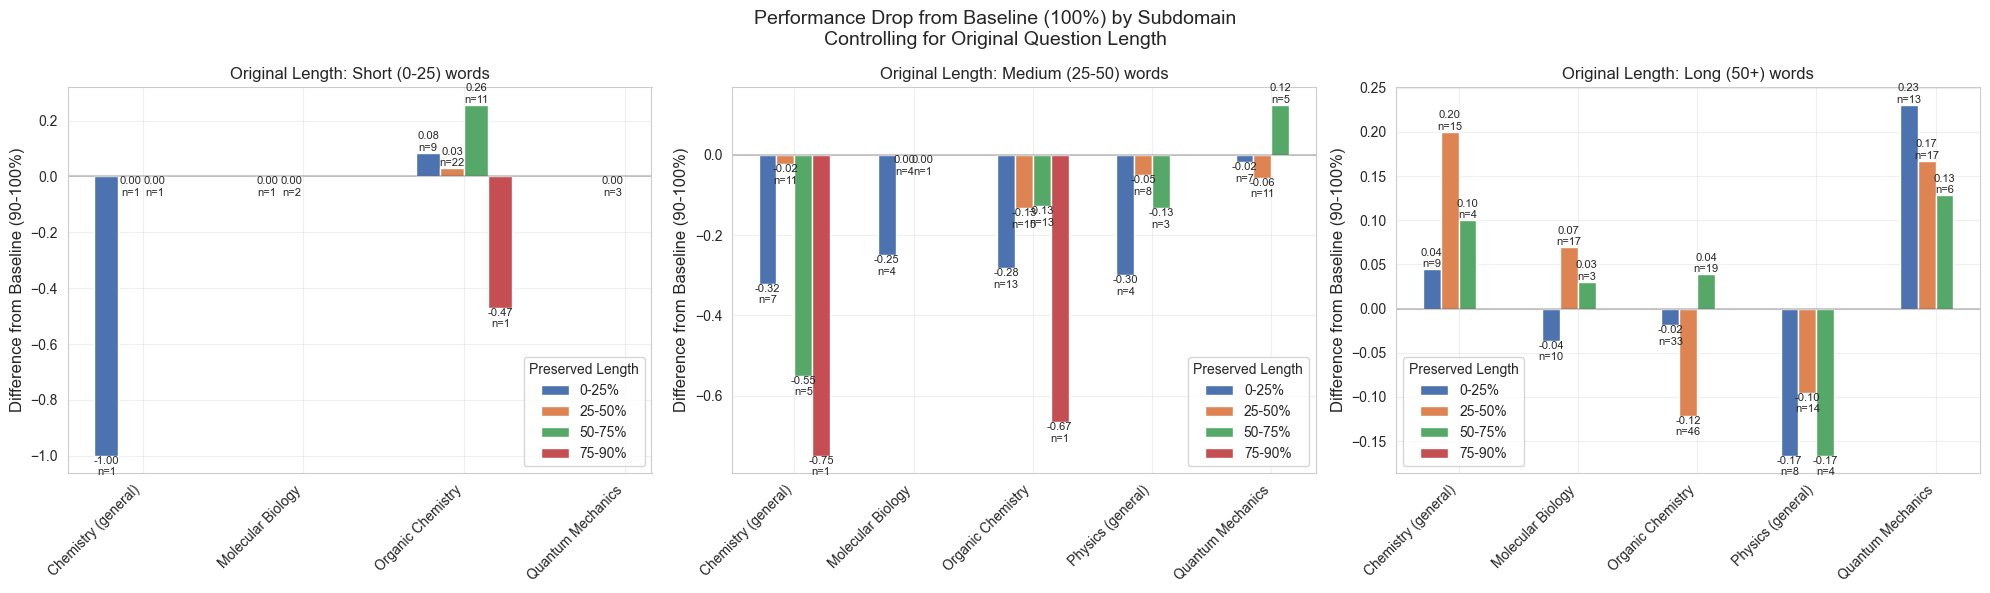


Baseline Performance (90-100% preserved):
                                          mean  count    std
original_length_bin Subdomain                               
Short (0-25)        Chemistry (general)  1.000      1    NaN
                    Molecular Biology    1.000      1    NaN
                    Organic Chemistry    0.471     17  0.514
                    Physics (general)      NaN      0    NaN
                    Quantum Mechanics    1.000      1    NaN
Medium (25-50)      Chemistry (general)  0.750      8  0.463
                    Molecular Biology    1.000      3  0.000
                    Organic Chemistry    0.667     15  0.488
                    Physics (general)    0.800      5  0.447
                    Quantum Mechanics    0.875      8  0.354
Long (50+)          Chemistry (general)  0.400     10  0.516
                    Molecular Biology    0.636     11  0.505
                    Organic Chemistry    0.382     34  0.493
                    Physics (general)    0

C:\Users\Bryan Sukidi\AppData\Local\Temp\ipykernel_31788\2049317636.py:87: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  baseline_stats = df_filtered[df_filtered['compression_bins'] == '90-100%'].groupby(['original_length_bin', 'Subdomain'])['correct'].agg(['mean', 'count', 'std']).round(3)


In [47]:
# Set seaborn style
sns.set_style("whitegrid")
sns.set_palette("deep")

# Check sample counts per domain
domain_counts = df['Subdomain'].value_counts()
print("Samples per domain:")
print(domain_counts)

# Let's set a minimum threshold of 50 samples per domain
min_samples = 50
valid_domains = domain_counts[domain_counts >= min_samples].index

# Filter for domains with enough samples
df_filtered = df[df['Subdomain'].isin(valid_domains)]

# Create bins for original question length
df_filtered['original_length_bin'] = pd.cut(df_filtered['original_word_count'], 
                                          bins=[0, 25, 50, float('inf')],
                                          labels=['Short (0-25)', 'Medium (25-50)', 'Long (50+)'])

# Create more granular compression bins
df_filtered['compression_bins'] = pd.cut(df_filtered['percent_of_original'],
                                       bins=[0, 25, 50, 75, 90, 100],
                                       labels=['0-25%', '25-50%', '50-75%', '75-90%', '90-100%'])

# Create figure with seaborn style
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Performance Drop from Baseline (100%) by Subdomain\nControlling for Original Question Length', fontsize=14)

# For each length bin
for i, length_bin in enumerate(['Short (0-25)', 'Medium (25-50)', 'Long (50+)']):
    # Filter data for this length bin
    length_data = df_filtered[df_filtered['original_length_bin'] == length_bin]
    
    # Calculate baseline performance (90-100% preserved)
    baseline = length_data[length_data['compression_bins'] == '90-100%'].groupby('Subdomain')['correct'].mean()
    
    # Calculate performance for each compression level
    performance = length_data.groupby(['Subdomain', 'compression_bins'])['correct'].agg(['mean', 'count']).reset_index()
    
    # Calculate difference from baseline
    for subdomain in baseline.index:
        mask = performance['Subdomain'] == subdomain
        performance.loc[mask, 'diff_from_baseline'] = performance.loc[mask, 'mean'] - baseline[subdomain]
    
    # Get unique subdomains and compression levels
    subdomains = sorted(length_data['Subdomain'].unique())
    compression_levels = ['0-25%', '25-50%', '50-75%', '75-90%']  # Exclude baseline
    
    x = np.arange(len(subdomains))
    width = 0.15  # Smaller width to fit all bars
    
    # Plot bars for each compression level
    for j, level in enumerate(compression_levels):
        level_data = performance[performance['compression_bins'] == level]
        bars = axes[i].bar(x + (j-1.5)*width, 
                          [level_data[level_data['Subdomain'] == sd]['diff_from_baseline'].iloc[0] 
                           if len(level_data[level_data['Subdomain'] == sd]) > 0 else 0
                           for sd in subdomains],
                          width, label=level)
        
        # Add value labels
        for k, bar in enumerate(bars):
            height = bar.get_height()
            count = level_data[level_data['Subdomain'] == subdomains[k]]['count'].iloc[0] \
                    if len(level_data[level_data['Subdomain'] == subdomains[k]]) > 0 else 0
            axes[i].text(bar.get_x() + bar.get_width()/2., height,
                        f'{height:.2f}\nn={count}',
                        ha='center', va='bottom' if height > 0 else 'top',
                        fontsize=8)
    
    # Customize subplot
    axes[i].set_ylabel('Difference from Baseline (90-100%)', fontsize=12)
    axes[i].set_title(f'Original Length: {length_bin} words', fontsize=12)
    axes[i].set_xticks(x)
    axes[i].set_xticklabels(subdomains, rotation=45, ha='right')
    axes[i].legend(title='Preserved Length', frameon=True)
    axes[i].grid(True, alpha=0.3)
    axes[i].axhline(y=0, color='black', linestyle='-', alpha=0.2)  # Add reference line at 0

plt.tight_layout()
plt.show()

# Print detailed statistics
print("\nBaseline Performance (90-100% preserved):")
baseline_stats = df_filtered[df_filtered['compression_bins'] == '90-100%'].groupby(['original_length_bin', 'Subdomain'])['correct'].agg(['mean', 'count', 'std']).round(3)
print(baseline_stats)

print("\nPerformance Drop from Baseline:")
for length_bin in ['Short (0-25)', 'Medium (25-50)', 'Long (50+)']:
    print(f"\n{length_bin}:")
    length_data = df_filtered[df_filtered['original_length_bin'] == length_bin]
    baseline = length_data[length_data['compression_bins'] == '90-100%'].groupby('Subdomain')['correct'].mean()
    for level in ['0-25%', '25-50%', '50-75%', '75-90%']:
        level_data = length_data[length_data['compression_bins'] == level].groupby('Subdomain')['correct'].mean()
        diff = level_data - baseline
        print(f"\n{level} preserved:")
        print(diff.round(3))

C:\Users\Bryan Sukidi\AppData\Local\Temp\ipykernel_31788\1907512212.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['compression_bins'] = pd.cut(df['percent_of_original'],
C:\Users\Bryan Sukidi\AppData\Local\Temp\ipykernel_31788\1907512212.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  performance = df.groupby(['Subdomain', 'compression_bins'])['correct'].agg(['mean', 'count']).reset_index()
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx

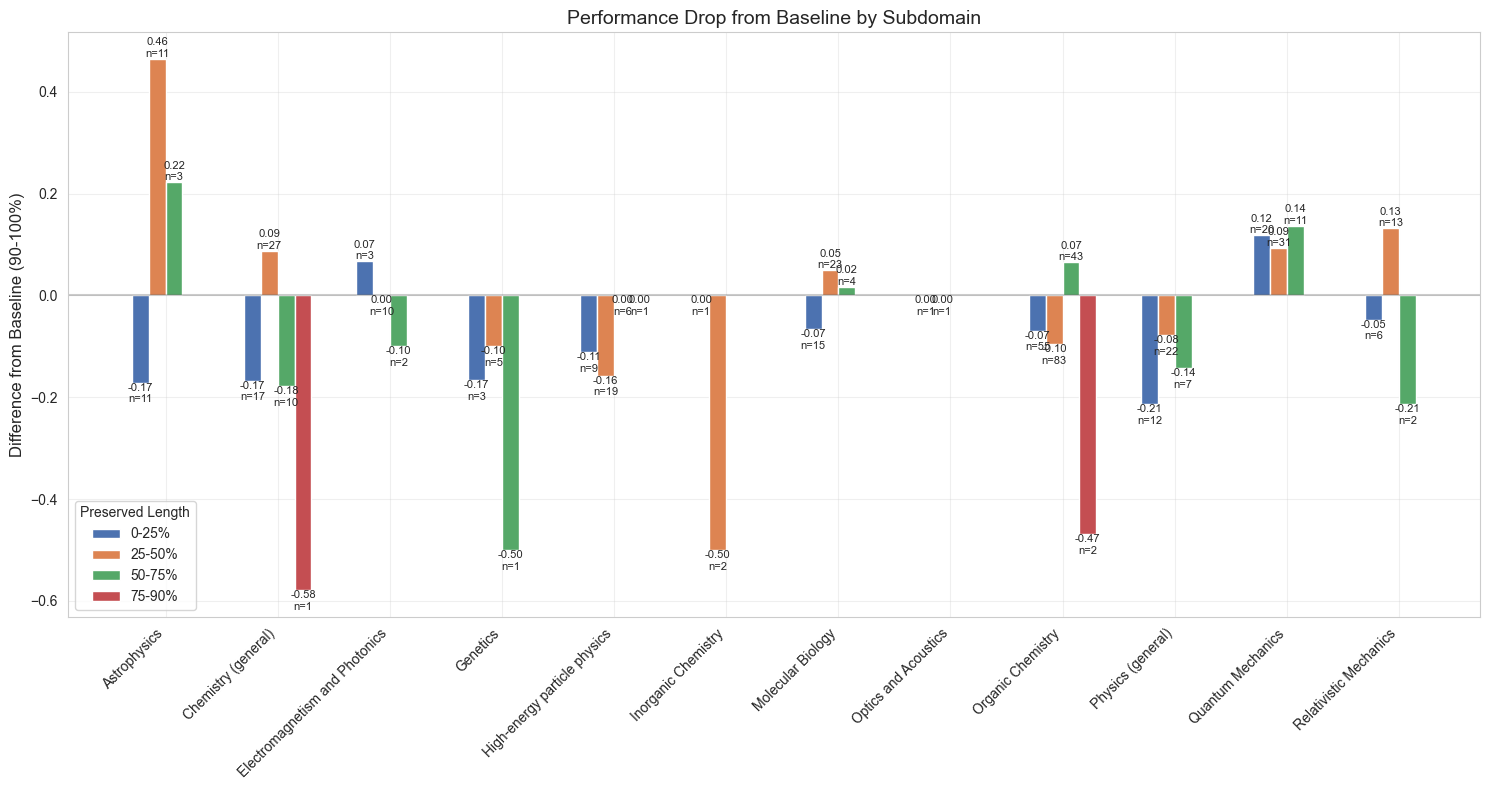


Baseline Performance (90-100% preserved):
                                 mean  count    std
Subdomain                                          
Astrophysics                    0.444      9  0.527
Chemistry (general)             0.579     19  0.507
Electromagnetism and Photonics  0.600      5  0.548
Genetics                        0.500      4  0.577
High-energy particle physics    1.000     12  0.000
Inorganic Chemistry             1.000      1    NaN
Molecular Biology               0.733     15  0.458
Optics and Acoustics            0.000      1    NaN
Organic Chemistry               0.470     66  0.503
Physics (general)               0.714     14  0.469
Quantum Mechanics               0.682     22  0.477
Relativistic Mechanics          0.714      7  0.488

Performance Drop from Baseline by Compression Level:

0-25% preserved:
Subdomain
Astrophysics                     -0.172
Chemistry (general)              -0.167
Electromagnetism and Photonics    0.067
Genetics                   

In [48]:
# Set seaborn style
sns.set_style("whitegrid")

# Create compression bins
df['compression_bins'] = pd.cut(df['percent_of_original'],
                              bins=[0, 25, 50, 75, 90, 100],
                              labels=['0-25%', '25-50%', '50-75%', '75-90%', '90-100%'])

# Create figure
plt.figure(figsize=(15, 8))

# Calculate baseline performance (90-100% preserved) for each domain
baseline = df[df['compression_bins'] == '90-100%'].groupby('Subdomain')['correct'].mean()

# Calculate performance for each compression level and domain
performance = df.groupby(['Subdomain', 'compression_bins'])['correct'].agg(['mean', 'count']).reset_index()

# Calculate difference from baseline
for subdomain in baseline.index:
    mask = performance['Subdomain'] == subdomain
    performance.loc[mask, 'diff_from_baseline'] = performance.loc[mask, 'mean'] - baseline[subdomain]

# Get unique subdomains and compression levels
subdomains = sorted(df['Subdomain'].unique())
compression_levels = ['0-25%', '25-50%', '50-75%', '75-90%']  # Exclude baseline

x = np.arange(len(subdomains))
width = 0.15  # Width of bars

# Plot bars for each compression level
colors = sns.color_palette("deep")[:4]  # Get 4 colors from seaborn palette
for i, (level, color) in enumerate(zip(compression_levels, colors)):
    level_data = performance[performance['compression_bins'] == level]
    bars = plt.bar(x + (i-1.5)*width, 
                   [level_data[level_data['Subdomain'] == sd]['diff_from_baseline'].iloc[0] 
                    if len(level_data[level_data['Subdomain'] == sd]) > 0 else 0
                    for sd in subdomains],
                   width, label=level, color=color)
    
    # Add value labels
    for j, bar in enumerate(bars):
        height = bar.get_height()
        count = level_data[level_data['Subdomain'] == subdomains[j]]['count'].iloc[0] \
                if len(level_data[level_data['Subdomain'] == subdomains[j]]) > 0 else 0
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.2f}\nn={count}',
                ha='center', va='bottom' if height > 0 else 'top',
                fontsize=8)

# Customize plot
plt.ylabel('Difference from Baseline (90-100%)', fontsize=12)
plt.title('Performance Drop from Baseline by Subdomain', fontsize=14)
plt.xticks(x, subdomains, rotation=45, ha='right')
plt.legend(title='Preserved Length', frameon=True)
plt.grid(True, alpha=0.3)
plt.axhline(y=0, color='black', linestyle='-', alpha=0.2)  # Add reference line at 0

# Adjust layout
plt.tight_layout()
plt.show()

# Print statistics
print("\nBaseline Performance (90-100% preserved):")
baseline_stats = df[df['compression_bins'] == '90-100%'].groupby('Subdomain')['correct'].agg(['mean', 'count', 'std']).round(3)
print(baseline_stats)

print("\nPerformance Drop from Baseline by Compression Level:")
for level in compression_levels:
    print(f"\n{level} preserved:")
    level_data = df[df['compression_bins'] == level].groupby('Subdomain')['correct'].mean()
    diff = level_data - baseline
    print(diff.round(3))

C:\Users\Bryan Sukidi\AppData\Local\Temp\ipykernel_31788\2622225832.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['compression_bins'] = pd.cut(df['percent_of_original'],


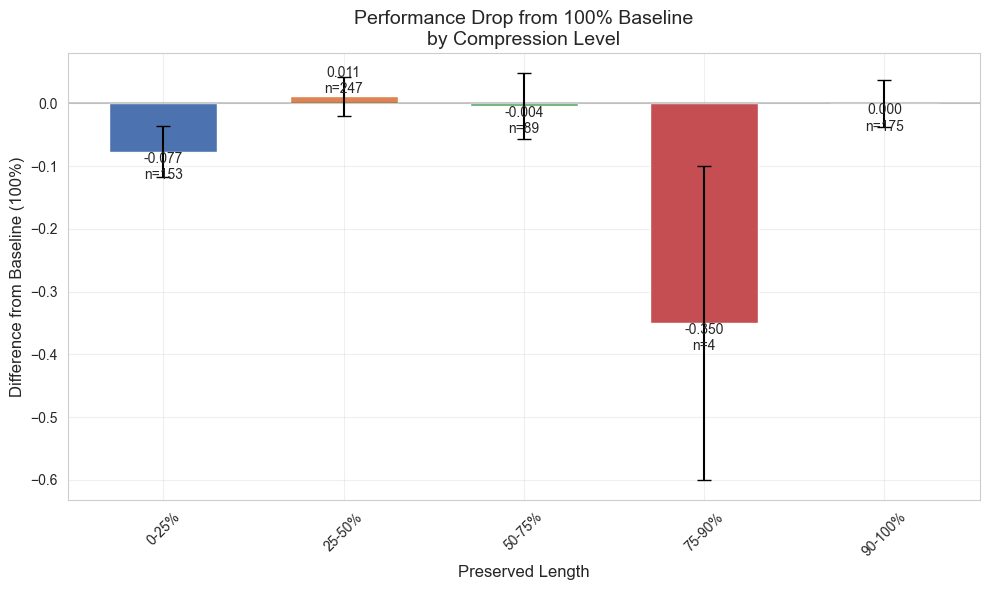


Detailed Statistics:
Baseline (100%) Accuracy: 0.600
Baseline Sample Size: 175

Performance Drops by Compression Level:

0-25%:
  Performance Drop: -0.077
  Standard Error: 0.041
  Sample Size: 153
  Relative Drop: -12.9%

25-50%:
  Performance Drop: 0.011
  Standard Error: 0.031
  Sample Size: 247
  Relative Drop: 1.9%

50-75%:
  Performance Drop: -0.004
  Standard Error: 0.052
  Sample Size: 89
  Relative Drop: -0.7%

75-90%:
  Performance Drop: -0.350
  Standard Error: 0.250
  Sample Size: 4
  Relative Drop: -58.3%

90-100%:
  Performance Drop: 0.000
  Standard Error: 0.037
  Sample Size: 175
  Relative Drop: 0.0%


In [50]:
# Set seaborn style
sns.set_style("whitegrid")

# Create compression bins
df['compression_bins'] = pd.cut(df['percent_of_original'],
                              bins=[0, 25, 50, 75, 90, 100],
                              labels=['0-25%', '25-50%', '50-75%', '75-90%', '90-100%'])

# Calculate baseline (100% preserved)
baseline_mask = df['percent_of_original'] >= 99  # Using 99 to catch any slight rounding
baseline_acc = df[baseline_mask]['correct'].mean()
baseline_se = df[baseline_mask]['correct'].std() / np.sqrt(len(df[baseline_mask]))

# Calculate performance drop for each compression level
compression_levels = ['0-25%', '25-50%', '50-75%', '75-90%', '90-100%']
performance_drops = []
standard_errors = []
sample_sizes = []

for level in compression_levels:
    level_data = df[df['compression_bins'] == level]
    acc = level_data['correct'].mean()
    se = level_data['correct'].std() / np.sqrt(len(level_data))
    performance_drops.append(acc - baseline_acc)
    standard_errors.append(se)
    sample_sizes.append(len(level_data))

# Create the plot
plt.figure(figsize=(10, 6))

# Plot bars
bars = plt.bar(range(len(compression_levels)), 
               performance_drops,
               width=0.6,
               color=sns.color_palette("deep"))

# Add error bars
plt.errorbar(range(len(compression_levels)), 
             performance_drops,
             yerr=standard_errors,
             fmt='none',
             color='black',
             capsize=5)

# Add value labels with sample sizes
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.3f}\nn={sample_sizes[i]}',
            ha='center', va='bottom' if height > 0 else 'top',
            fontsize=10)

# Customize plot
plt.title('Performance Drop from 100% Baseline\nby Compression Level', fontsize=14)
plt.ylabel('Difference from Baseline (100%)', fontsize=12)
plt.xlabel('Preserved Length', fontsize=12)
plt.xticks(range(len(compression_levels)), compression_levels, rotation=45)
plt.grid(True, alpha=0.3)
plt.axhline(y=0, color='black', linestyle='-', alpha=0.2)  # Add reference line at 0

plt.tight_layout()
plt.show()

# Print detailed statistics
print("\nDetailed Statistics:")
print(f"Baseline (100%) Accuracy: {baseline_acc:.3f}")
print(f"Baseline Sample Size: {len(df[baseline_mask])}")
print("\nPerformance Drops by Compression Level:")
for level, drop, se, n in zip(compression_levels, performance_drops, standard_errors, sample_sizes):
    print(f"\n{level}:")
    print(f"  Performance Drop: {drop:.3f}")
    print(f"  Standard Error: {se:.3f}")
    print(f"  Sample Size: {n}")
    print(f"  Relative Drop: {(drop/baseline_acc*100):.1f}%")